### Importação dos dados



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [ ]:
def analisar_faturamento(loja, nome_loja):
    faturamento = loja['Preço'].sum()
    # Formatação do valor no padrão brasileiro de moeda
    print(f'Faturamento Total da {nome_loja}: R$ {faturamento:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.'))
    return faturamento

faturamento_loja1 = analisar_faturamento(loja, 'Loja 1')
faturamento_loja2 = analisar_faturamento(loja2, 'Loja 2')
faturamento_loja3 = analisar_faturamento(loja3, 'Loja 3')
faturamento_loja4 = analisar_faturamento(loja4, 'Loja 4')


Faturamento Total da Loja 1: R$ 1.534.509,12
Faturamento Total da Loja 2: R$ 1.488.459,06
Faturamento Total da Loja 3: R$ 1.464.025,03
Faturamento Total da Loja 4: R$ 1.384.497,58


# 2. Vendas por Categoria


In [ ]:
def faturamento_por_categoria_mais_populares(loja, nome_loja):
    """
    Função que agrupa e mostra as categorias mais populares (com base nas vendas) por loja,
    e informa a categoria com maior quantidade de vendas (em negrito).
    """
    # Agrupa por categoria e conta a quantidade de vendas
    quantidade_categoria = loja.groupby('Categoria do Produto').size().reset_index(name='Quantidade de Vendas')

    # Ordena da mais vendida para a menos vendida
    quantidade_categoria = quantidade_categoria.sort_values(by='Quantidade de Vendas', ascending=False)

    # Exibe tabela de categorias por loja
    print(f'\nCategorias mais populares - {nome_loja}:')
    print(quantidade_categoria)

    # Pega a categoria mais vendida
    categoria_mais_vendida = quantidade_categoria.iloc[0]
    categoria = categoria_mais_vendida['Categoria do Produto']
    vendas = categoria_mais_vendida['Quantidade de Vendas']

    # ---------- ESCOLHA UMA DAS FORMATAÇÕES ABAIXO ----------

    # ✅ Versão com ANSI (funciona na maioria dos terminais modernos)
    print(f"\nCategoria mais vendida na {nome_loja}: \033[1m{categoria}\033[0m com \033[1m{vendas}\033[0m vendas.")

    # 🔹 Versão com asteriscos (descomente se preferir universal)
    # print(f"\nCategoria mais vendida na {nome_loja}: **{categoria}** com **{vendas}** vendas.")

    return quantidade_categoria


# Chamadas da função para cada loja
faturamento_loja1 = faturamento_por_categoria_mais_populares(loja, 'Loja 1')
faturamento_loja2 = faturamento_por_categoria_mais_populares(loja2, 'Loja 2')
faturamento_loja3 = faturamento_por_categoria_mais_populares(loja3, 'Loja 3')
faturamento_loja4 = faturamento_por_categoria_mais_populares(loja4, 'Loja 4')



Categorias mais populares - Loja 1:
    Categoria do Produto  Quantidade de Vendas
6                 moveis                   480
2            eletronicos                   451
0             brinquedos                   338
3        esporte e lazer                   277
1       eletrodomesticos                   254
7  utilidades domesticas                   201
5                 livros                   187
4  instrumentos musicais                   170

Categoria mais vendida na Loja 1: moveis com 480 vendas.

Categorias mais populares - Loja 2:
    Categoria do Produto  Quantidade de Vendas
6                 moveis                   442
2            eletronicos                   422
0             brinquedos                   313
1       eletrodomesticos                   305
3        esporte e lazer                   275
4  instrumentos musicais                   224
5                 livros                   197
7  utilidades domesticas                   181

Categoria mais vendid

# 3. Média de Avaliação dos clientes das Lojas

In [ ]:
# print(loja.columns)

# avaliacao_compra = loja['Avaliação da compra'].sum()
# media_loja1 = avaliacao_compra / len(loja['Avaliação da compra'])
def avaliacao_media(loja, nome_loja):
  """
  Função para calcular e exibir a média de avaliação por cada loja.

  Parâmetros:
  loja (DataFrame): O DataFrame contendo os dados da loja.
  nome_loja (str): Nome da loja para exibição.

  Build-Function:
  .mean(): calcular a média

  """
  media_loja = loja['Avaliação da compra'].mean()
  print(f'Média da {nome_loja}: {media_loja: .2f}')

avaliacao_media(loja, 'Loja 1')
avaliacao_media(loja2, 'Loja 2')
avaliacao_media(loja3, 'Loja 3')
avaliacao_media(loja4, 'Loja 4')




Média da Loja 1:  4.00
Média da Loja 2:  4.04
Média da Loja 3:  4.05
Média da Loja 4:  4.00


# 4. Produtos Mais e Menos Vendidos

In [ ]:
def produtos_mais_menos_vendidos(loja, nome_loja):
    """
    Função para verificar os produtos mais e menos vendidos em cada loja.

    Parâmetros:
    loja (DataFrame): O DataFrame contendo os dados da loja.
    nome_loja (str): Nome da loja para exibição.
    """
    vendas_produto = loja.groupby('Produto')['Preço'].sum()

    produto_mais_vendido = vendas_produto.sort_values(ascending=False).head(1)
    produto_menos_vendido = vendas_produto.sort_values(ascending=False).tail(1)

    print(f'\n{nome_loja}')
    print('Produto mais vendido:')
    for produto, valor in produto_mais_vendido.items():
        print(f'{produto}: R$ {valor:.2f}')

    print('Produto menos vendido:')
    for produto, valor in produto_menos_vendido.items():
        print(f'{produto}: R$ {valor:.2f}')

# Lista de lojas com nomes
lojas = [
    (loja, 'Loja 1'),
    (loja2, 'Loja 2'),
    (loja3, 'Loja 3'),
    (loja4, 'Loja 4')
]

# Executa para cada loja
for loja, nome in lojas:
    produtos_mais_menos_vendidos(loja, nome)



Loja 1
Produto mais vendido:
Celular Plus X42: R$ 128930.07
Produto menos vendido:
Corda de pular: R$ 939.74

Loja 2
Produto mais vendido:
Celular Plus X42: R$ 150967.83
Produto menos vendido:
Cubo mágico 8x8: R$ 858.22

Loja 3
Produto mais vendido:
Geladeira: R$ 133185.99
Produto menos vendido:
Cubo mágico 8x8: R$ 853.81

Loja 4
Produto mais vendido:
Celular Plus X42: R$ 128930.07
Produto menos vendido:
Corda de pular: R$ 939.74


In [ ]:
def obter_dados_mais_menos(loja, nome_loja):
    vendas_produto = loja.groupby('Produto')['Preço'].sum()
    produto_mais_vendido = vendas_produto.sort_values(ascending=False).head(1)
    produto_menos_vendido = vendas_produto.sort_values(ascending=False).tail(1)

    # Retorna tuplas com nome_loja + nome_produto e valor total com 2 casas decimais
    return [
        (f'{nome_loja} | {produto_mais_vendido.index[0]}', round(produto_mais_vendido.values[0], 2)),
        (f'{nome_loja} | {produto_menos_vendido.index[0]}', round(produto_menos_vendido.values[0], 2))
    ]

dados = []
for loja, nome in lojas:
    dados.extend(obter_dados_mais_menos(loja, nome))

# Imprime os dados com formatação de moeda
for nome, valor in dados:
    # Formatação para "R$ 1000,00"
    print(f'{nome}: R$ {valor:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.'))


Loja 1 | Celular Plus .42: R$ 128.930,07
Loja 1 | Corda de pular: R$ 939,74
Loja 2 | Celular Plus .42: R$ 150.967,83
Loja 2 | Cubo mágico 8x8: R$ 858,22
Loja 3 | Geladeira: R$ 133.185,99
Loja 3 | Cubo mágico 8x8: R$ 853,81
Loja 4 | Celular Plus .42: R$ 128.930,07
Loja 4 | Corda de pular: R$ 939,74


# 5. Frete Médio por Loja


In [ ]:
def media_loja_frete(loja, nome_loja):
    """
    Função para calcular e exibir a média de frete de uma loja.
    """
    media_frete = loja['Frete'].mean()
    # Exibe a média formatada com 2 casas decimais
    print(f'Média de Frete para {nome_loja}: R$ {media_frete:.2f}')

# Cria lista com todas as lojas corretamente nomeadas
lojas = [(loja1, 'Loja 1'), (loja2, 'Loja 2'), (loja3, 'Loja 3'), (loja4, 'Loja 4')]

# Loop para calcular a média de frete
for loja, nome in lojas:
    media_loja_frete(loja, nome)


Média de Frete para Loja 1: R$ 31.28
Média de Frete para Loja 2: R$ 33.62
Média de Frete para Loja 3: R$ 33.07
Média de Frete para Loja 4: R$ 31.28


A Loja 1 e a Loja 4 apresentam o menor frete médio, com uma média de 31,28 - seguidas pela Loja 3, com um frete médio de 33,07, e pela Loja 2, que registrou o maior valor, 33,62.

## 6. Relatório

O objetivo desta análise é fornecer ao Sr. João, proprietário de quatro lojas, uma avaliação detalhada do desempenho de cada uma delas, com o intuito de identificar qual loja apresenta os piores resultados e, portanto, seria mais apropriada para ser vendida. Essa decisão permitirá ao Sr. João direcionar novos investimentos estratégicos. A seguir, faremos uma análise criteriosa de vários aspectos de cada loja e, ao final, apresentaremos uma recomendação sobre qual loja seria mais indicada para ser descontinuada.

Faturamento Total da Loja 1: R$ 1.384.497,58
Faturamento Total da Loja 2: R$ 1.488.459,06
Faturamento Total da Loja 3: R$ 1.464.025,03
Faturamento Total da Loja 4: R$ 1.384.497,58


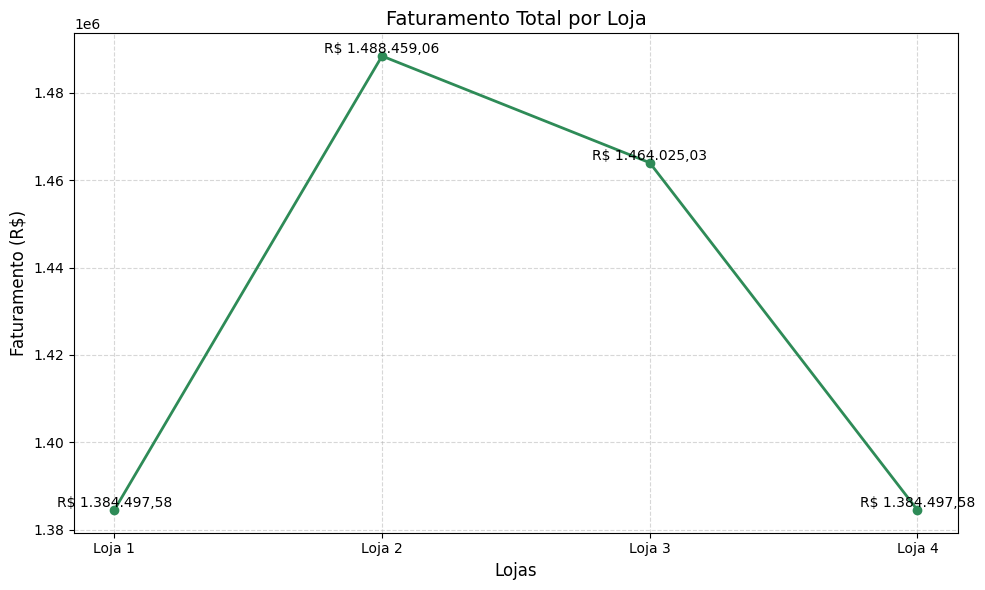

In [ ]:
import matplotlib.pyplot as plt

def analisar_faturamento(loja, nome_loja):
    """
    Calcula e exibe o faturamento total de uma loja.
    """
    faturamento = loja['Preço'].sum()
    print(f'Faturamento Total da {nome_loja}: R$ {faturamento:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.'))
    return faturamento

# Coleta dos dados
faturamento_loja1 = analisar_faturamento(loja, 'Loja 1')
faturamento_loja2 = analisar_faturamento(loja2, 'Loja 2')
faturamento_loja3 = analisar_faturamento(loja3, 'Loja 3')
faturamento_loja4 = analisar_faturamento(loja4, 'Loja 4')

# Dados para o gráfico
nomes_lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
valores_faturamento = [faturamento_loja1, faturamento_loja2, faturamento_loja3, faturamento_loja4]

# Gráfico de linha
plt.figure(figsize=(10, 6))
plt.plot(nomes_lojas, valores_faturamento, marker='o', linestyle='-', color='seagreen', linewidth=2)

# Adiciona os valores formatados em R$
for i, valor in enumerate(valores_faturamento):
    plt.text(i, valor, f'R$ {valor:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.'),
             ha='center', va='bottom', fontsize=10)

# Estética do gráfico
plt.title('Faturamento Total por Loja', fontsize=14)
plt.xlabel('Lojas', fontsize=12)
plt.ylabel('Faturamento (R$)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig('grafico_faturamento_total_linhas.png', dpi=300)
plt.show()



Faturamento por Categoria - Todas as Lojas:
    Categoria do Produto  Faturamento
2            eletronicos   2187407.35
1       eletrodomesticos   1659104.32
6                 moveis   1016741.54
4  instrumentos musicais    443434.48
3        esporte e lazer    182713.49
0             brinquedos    101162.75
7  utilidades domesticas     79940.73
5                 livros     50974.59


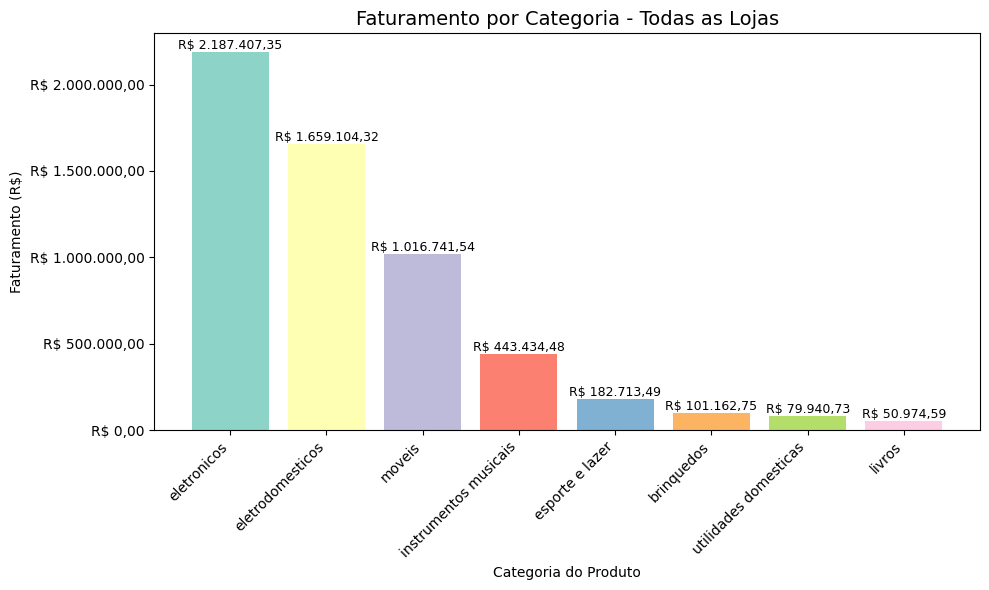

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd

def faturamento_por_categoria_todas_lojas(lojas, nome_geral='Todas as Lojas'):
    """
    Gera um gráfico de barras com o faturamento por categoria somando os dados de todas as lojas.
    """
    # Concatenar os DataFrames das lojas
    dados_consolidados = pd.concat(lojas)

    # Agrupar por categoria e somar os preços
    faturamento_categoria = dados_consolidados.groupby('Categoria do Produto')['Preço'].sum().reset_index(name='Faturamento')

    # Ordenar por faturamento
    faturamento_categoria = faturamento_categoria.sort_values(by='Faturamento', ascending=False)

    print(f'\nFaturamento por Categoria - {nome_geral}:')
    print(faturamento_categoria)

    # Função para formatar valores monetários no padrão brasileiro
    def formatar_moeda(valor, _):
        return f'R$ {valor:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.')

    # Gráfico de barras
    plt.figure(figsize=(10, 6))
    barras = plt.bar(
        faturamento_categoria['Categoria do Produto'],
        faturamento_categoria['Faturamento'],
        color=plt.cm.Set3.colors
    )

    # Adicionar valores no topo das barras com o formato monetário
    for barra in barras:
        valor = barra.get_height()
        plt.text(
            barra.get_x() + barra.get_width() / 2,
            valor,
            f'R$ {valor:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.'),
            ha='center',
            va='bottom',
            fontsize=9
        )

    # Personalizações
    plt.xlabel('Categoria do Produto')
    plt.ylabel('Faturamento (R$)')
    plt.title(f'Faturamento por Categoria - {nome_geral}', fontsize=14)
    plt.xticks(rotation=45, ha='right')

    # Aplicar formatação monetária no eixo Y
    plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(formatar_moeda))

    plt.tight_layout()
    plt.savefig('faturamento_categoria_todas_lojas.png', dpi=300)
    plt.show()

# Exemplo de uso:
faturamento_por_categoria_todas_lojas([loja, loja2, loja3, loja4])


Média da Loja 1: 4.00
Média da Loja 2: 4.04
Média da Loja 3: 4.05
Média da Loja 4: 4.00


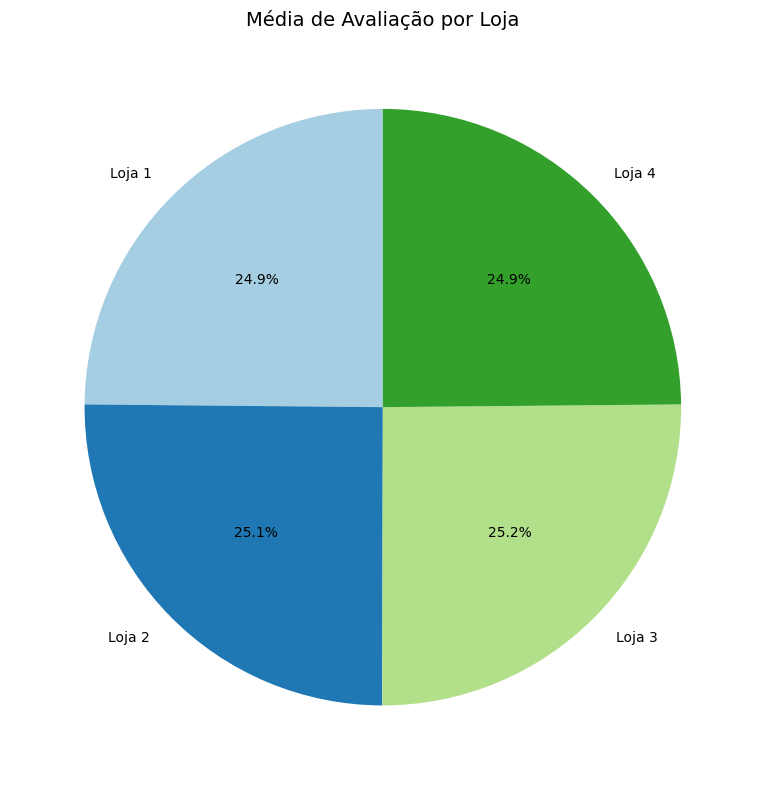

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

def avaliacao_media(lojas, nomes_lojas):
    """
    Função para calcular e exibir a média de avaliação por cada loja e gerar um gráfico de pizza.

    Parâmetros:
    lojas (list): Lista de DataFrames contendo os dados das lojas.
    nomes_lojas (list): Lista de nomes das lojas para exibição no gráfico.

    Build-Function:
    .mean(): calcular a média
    """
    medias = []

    for loja in lojas:
        media_loja = loja['Avaliação da compra'].mean()
        medias.append(media_loja)

    # Exibir as médias
    for nome_loja, media in zip(nomes_lojas, medias):
        print(f'Média da {nome_loja}: {media:.2f}')

    # Gerar gráfico de pizza
    plt.figure(figsize=(8, 8))
    plt.pie(
        medias,
        labels=nomes_lojas,
        autopct='%1.1f%%',
        startangle=90,
        colors=plt.cm.Paired.colors
    )
    plt.title('Média de Avaliação por Loja', fontsize=14)
    plt.tight_layout()
    plt.show()

# Exemplo de uso
avaliacao_media([loja, loja2, loja3, loja4], ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'])





Loja 1
Produto mais vendido: 
Produto
Celular Plus X42    128930.07
Name: Preço, dtype: float64
Produto menos vendido: 
Produto
Corda de pular    939.74
Name: Preço, dtype: float64

Loja 2
Produto mais vendido: 
Produto
Celular Plus X42    150967.83
Name: Preço, dtype: float64
Produto menos vendido: 
Produto
Cubo mágico 8x8    858.22
Name: Preço, dtype: float64

Loja 3
Produto mais vendido: 
Produto
Geladeira    133185.99
Name: Preço, dtype: float64
Produto menos vendido: 
Produto
Cubo mágico 8x8    853.81
Name: Preço, dtype: float64

Loja 4
Produto mais vendido: 
Produto
Celular Plus X42    128930.07
Name: Preço, dtype: float64
Produto menos vendido: 
Produto
Corda de pular    939.74
Name: Preço, dtype: float64


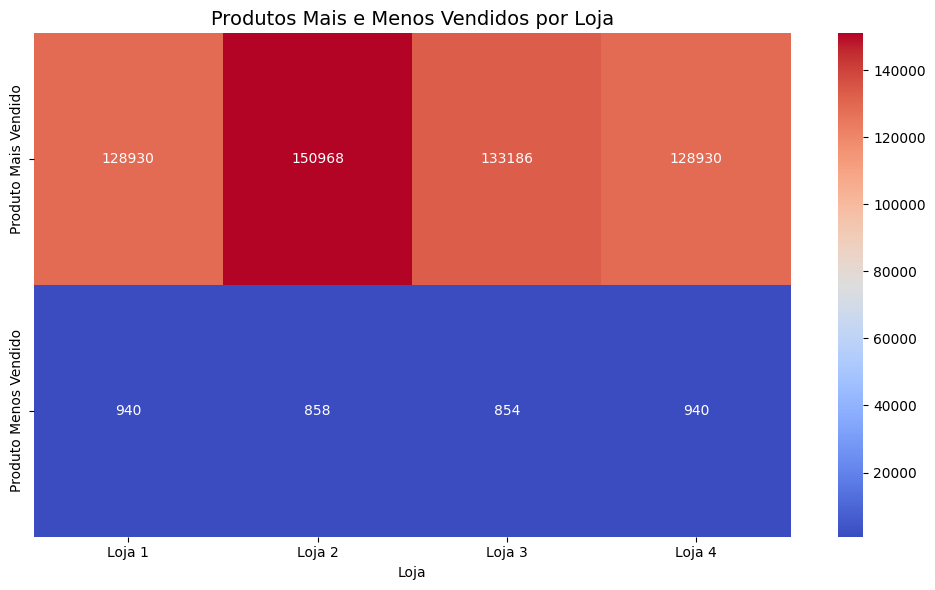


Loja 1
Produto mais vendido: R$ 128.930,07
Produto menos vendido: R$ 939,74

Loja 2
Produto mais vendido: R$ 150.967,83
Produto menos vendido: R$ 858,22

Loja 3
Produto mais vendido: R$ 133.185,99
Produto menos vendido: R$ 853,81

Loja 4
Produto mais vendido: R$ 128.930,07
Produto menos vendido: R$ 939,74


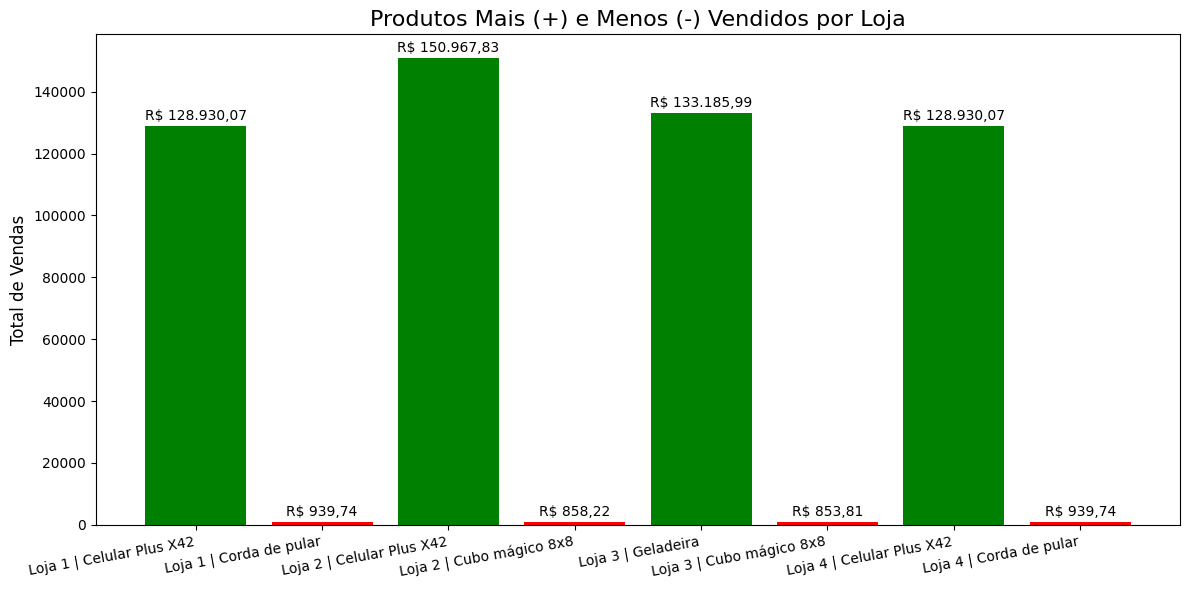

[('Loja 1 | Celular Plus X42', 'R$ 128.930,07'),
 ('Loja 1 | Corda de pular', 'R$ 939,74'),
 ('Loja 2 | Celular Plus X42', 'R$ 150.967,83'),
 ('Loja 2 | Cubo mágico 8x8', 'R$ 858,22'),
 ('Loja 3 | Geladeira', 'R$ 133.185,99'),
 ('Loja 3 | Cubo mágico 8x8', 'R$ 853,81'),
 ('Loja 4 | Celular Plus X42', 'R$ 128.930,07'),
 ('Loja 4 | Corda de pular', 'R$ 939,74')]

In [ ]:
import matplotlib.pyplot as plt

# Função para formatar valores como R$ 1.000,00
def formatar_moeda(valor):
    return f'R$ {valor:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.')

def obter_dados_mais_menos(loja, nome_loja):
    vendas_produto = loja.groupby('Produto')['Preço'].sum()
    produto_mais_vendido = vendas_produto.sort_values(ascending=False).head(1)
    produto_menos_vendido = vendas_produto.sort_values(ascending=False).tail(1)

    # Retorna tuplas com nome_loja + nome_produto e valor total
    return [
        (f'{nome_loja} | {produto_mais_vendido.index[0]}', produto_mais_vendido.values[0]),
        (f'{nome_loja} | {produto_menos_vendido.index[0]}', produto_menos_vendido.values[0])
    ]

dados = []
for loja, nome in lojas:
    dados.extend(obter_dados_mais_menos(loja, nome))

# Separar para o gráfico
labels = [item[0] for item in dados]
valores = [item[1] for item in dados]
cores = ['green', 'red'] * 4

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(labels, valores, color=cores)
plt.title('Produtos Mais (+) e Menos (-) Vendidos por Loja', fontsize=16)
plt.ylabel('Total de Vendas', fontsize=12)
plt.xticks(rotation=10, ha='right')

# Exibir valores formatados em moeda nas barras
for i, v in enumerate(valores):
    plt.text(i, v + 1000, formatar_moeda(v), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.savefig('obter_dados_mais_menos.png', dpi=300, bbox_inches='tight')
plt.show()

# Exibir os dados com valores formatados
dados_formatados = [(label, formatar_moeda(valor)) for label, valor in dados]
dados_formatados


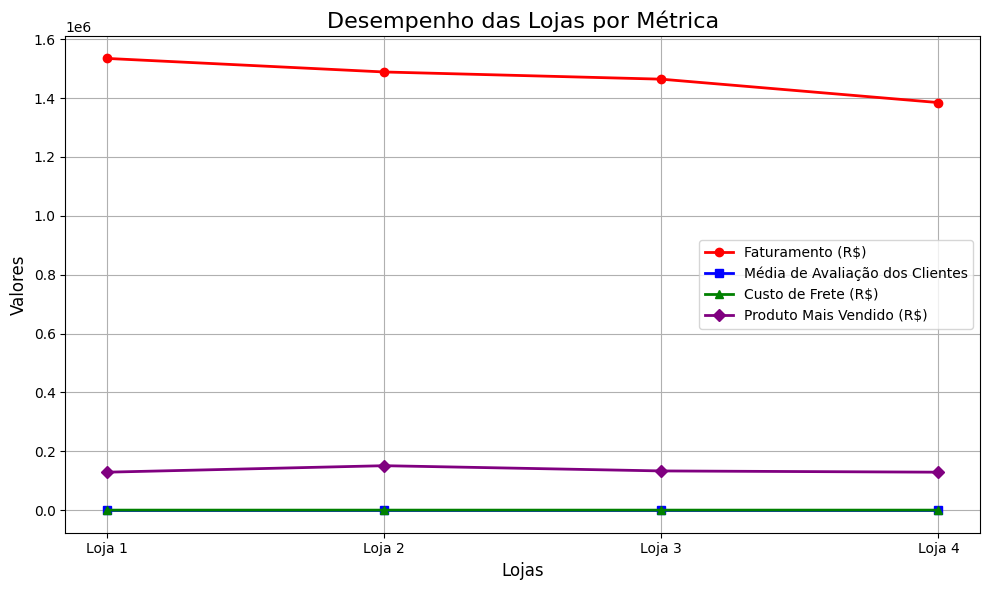

Ranking de Desempenho das Lojas:
     Loja  Ranking Geral  Faturamento (R$)  Média de Avaliação dos Clientes  \
0  Loja 1            8.0        1534509.12                             4.00   
1  Loja 2            9.0        1488459.06                             4.04   
2  Loja 3            9.0        1464025.03                             4.05   
3  Loja 4           11.0        1384497.58                             4.00   

   Custo de Frete (R$)  Produto Mais Vendido (R$)  
0                31.28                  128930.07  
1                33.62                  150967.83  
2                33.07                  133185.99  
3                31.28                  128930.07  

Justificativa para a venda da loja:
A loja que deve ser considerada para venda é Loja 1 devido ao pior desempenho geral, com destaque negativo nas seguintes métricas:
- Faturamento: R$ 1534509.12 (Menor faturamento)
- Média de Avaliação: 4.0 (Avaliação baixa)
- Custo de Frete: R$ 31.28 (Custo de frete elevado

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Dados das lojas
lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
faturamento = [1534509.12, 1488459.06, 1464025.03, 1384497.58]
media_avaliacao_clientes = [4.00, 4.04, 4.05, 4.00]  # Média de avaliação dos clientes
frete_medio = [31.28, 33.62, 33.07, 31.28]  # Média do custo de frete
produto_mais_vendido = [128930.07, 150967.83, 133185.99, 128930.07]  # Preço do produto mais vendido

# Criando o gráfico de linhas
plt.figure(figsize=(10, 6))

# Plotando cada métrica
plt.plot(lojas, faturamento, marker='o', color='red', label='Faturamento (R$)', linewidth=2)
plt.plot(lojas, media_avaliacao_clientes, marker='s', color='blue', label='Média de Avaliação dos Clientes', linewidth=2)
plt.plot(lojas, frete_medio, marker='^', color='green', label='Custo de Frete (R$)', linewidth=2)
plt.plot(lojas, produto_mais_vendido, marker='D', color='purple', label='Produto Mais Vendido (R$)', linewidth=2)

# Adicionando título e rótulos
plt.title('Desempenho das Lojas por Métrica', fontsize=16)
plt.xlabel('Lojas', fontsize=12)
plt.ylabel('Valores', fontsize=12)
plt.legend()

# Exibindo o gráfico
plt.grid(True)
plt.tight_layout()
plt.show()

# Criando o DataFrame para a tabela de ranking
dados = {
    'Loja': lojas,
    'Faturamento (R$)': faturamento,
    'Média de Avaliação dos Clientes': media_avaliacao_clientes,
    'Custo de Frete (R$)': frete_medio,
    'Produto Mais Vendido (R$)': produto_mais_vendido
}

df = pd.DataFrame(dados)

# Calculando o ranking por cada métrica
df['Ranking Faturamento'] = df['Faturamento (R$)'].rank(ascending=False, method='min')
df['Ranking Avaliação'] = df['Média de Avaliação dos Clientes'].rank(ascending=False, method='min')
df['Ranking Frete'] = df['Custo de Frete (R$)'].rank(ascending=True, method='min')
df['Ranking Produto'] = df['Produto Mais Vendido (R$)'].rank(ascending=False, method='min')

# Calculando o ranking final baseado na soma dos rankings
df['Ranking Geral'] = df[['Ranking Faturamento', 'Ranking Avaliação', 'Ranking Frete', 'Ranking Produto']].sum(axis=1)

# Ordenando pelo ranking geral
df_sorted = df.sort_values('Ranking Geral').reset_index(drop=True)

# Exibindo a tabela com o ranking
print("Ranking de Desempenho das Lojas:")
print(df_sorted[['Loja', 'Ranking Geral', 'Faturamento (R$)', 'Média de Avaliação dos Clientes', 'Custo de Frete (R$)', 'Produto Mais Vendido (R$)']])

# Justificativa para a loja a ser vendida
pior_loja = df_sorted.iloc[0]  # A loja com o pior desempenho geral
loja_vendida = pior_loja['Loja']
justificativa = f"A loja que deve ser considerada para venda é {loja_vendida} devido ao pior desempenho geral, " \
                f"com destaque negativo nas seguintes métricas:\n" \
                f"- Faturamento: R$ {pior_loja['Faturamento (R$)']:.2f} (Menor faturamento)\n" \
                f"- Média de Avaliação: {pior_loja['Média de Avaliação dos Clientes']} (Avaliação baixa)\n" \
                f"- Custo de Frete: R$ {pior_loja['Custo de Frete (R$)']:.2f} (Custo de frete elevado)\n" \
                f"- Produto Mais Vendido: R$ {pior_loja['Produto Mais Vendido (R$)']:.2f} (Produto de menor valor)\n" \
                f"Essa loja tem o pior desempenho em todas as métricas comparadas, o que justifica a decisão de venda."

# Exibindo a justificativa
print("\nJustificativa para a venda da loja:")
print(justificativa)
